In [3]:
import tensorflow as tf
import numpy as np
import torch
import matplotlib.pyplot as plt

# TF

## TF gradient tape

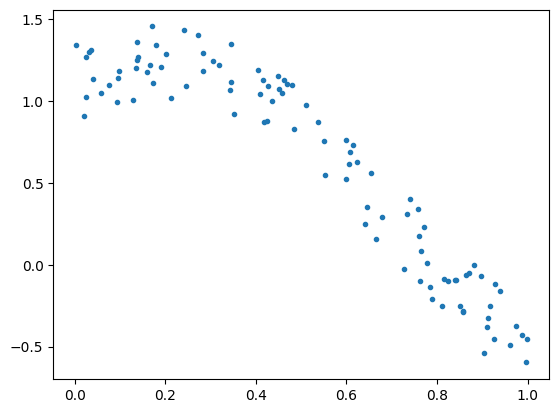

In [6]:
# generate data in np term
N_sam = 100
x = np.random.rand(N_sam, 1)
y = np.sin(3*x+1)+0.5*np.random.rand(N_sam, 1)

plt.plot(x[:,0], y[:,0], ".")

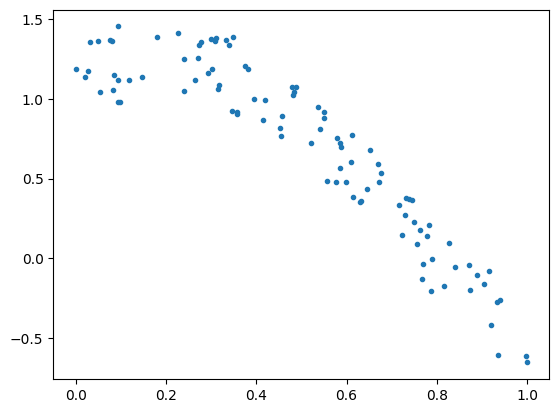

In [11]:
# generate data in tf form
x = tf.random.uniform((N_sam, 1))
y = tf.sin(3 * x + 1) + .5 * tf.random.uniform((N_sam, 1))
plt.plot(x[:, 0], y[:, 0], '.')
plt.show()

In [12]:
# MLP layers [1, 32, 16, 1]
# w = []
# b = []

w1 = tf.Variable(tf.random.normal((1, 32)))
w2 = tf.Variable(tf.random.normal((32, 16)))
w3 = tf.Variable(tf.random.normal((16, 1)))

b1 = tf.Variable(tf.random.normal((32,)))
b2 = tf.Variable(tf.random.normal((16,)))
b3 = tf.Variable(tf.random.normal((1,)))

def model(x):
    #sigmoid (0-1)
    x = tf.sigmoid(x @ w1+b1) #hyperplane+activation layer
    x = tf.sigmoid(x @ w2+b2)

    return x @ w3+b3 #activation function = linear

def mse(pred, target): #loss
    e = pred - target
    return tf.reduce_mean(e*e) #mean

lr = 0.1
for epoch in range(1, 3001):
    with tf.GradientTape() as t:
        p = model(x)
        loss = mse(p, y)
    
    if(epoch%1000==0):
        print(epoch, loss.numpy())

    dw1, db1, dw2, db2, dw3, db3 = t.gradient(loss, [w1, b1, w2, b2, w3, b3]) #diff

    # add gradient but not all
    w1.assign_sub(dw1*lr)
    w2.assign_sub(dw2*lr)
    w3.assign_sub(dw3*lr)
    b1.assign_sub(db1*lr)
    b2.assign_sub(db2*lr)
    b3.assign_sub(db3*lr)


1000 0.024494296
2000 0.022777699
3000 0.021639418


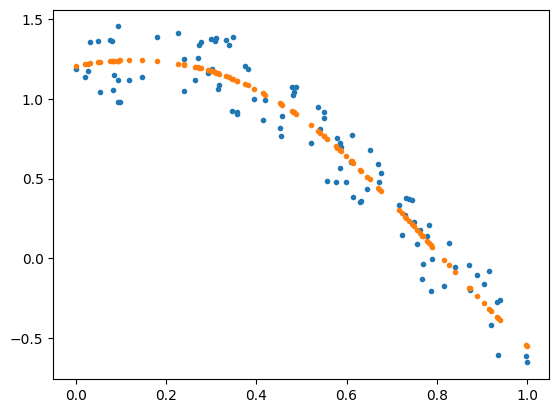

In [13]:
# plot model output
z = model(x).numpy()

plt.plot(x[:,0], y[:,0], ".")
plt.plot(x[:,0], z[:,0], ".")
plt.show()

## TF with keras

### Sequential
domino - one way

In [16]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input

In [17]:
model = keras.Sequential([
    Input((1,)),
    Dense(32, activation='sigmoid'),
    Dense(16, activation='sigmoid'),
    Dense(1)
])

In [18]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(0.1))

In [20]:
model.fit(x, y, epochs=3000)

Epoch 1/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3260 
Epoch 2/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3289 
Epoch 3/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4109 
Epoch 4/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3064 
Epoch 5/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3469 
Epoch 6/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3053 
Epoch 7/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3841 
Epoch 8/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3735 
Epoch 9/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3265 
Epoch 10/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3316 
Epoch 11/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 0.3142
Epoch 12/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.3467
Epoch 13/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2908 
Epoch 14/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3557 
Epoch 15/3000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3120 
Ep

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


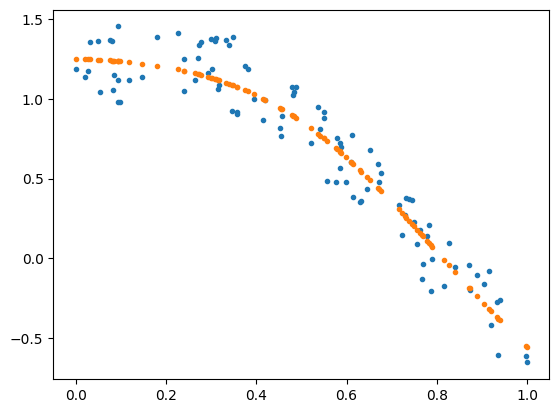

In [21]:
z = model.predict(x)

plt.plot(x[:,0], y[:,0], ".")
plt.plot(x[:,0], z[:,0], ".")
plt.show()

### Model

In [22]:
inputs = Input((1,))
fc1 = Dense(32, activation='sigmoid')
fc2 = Dense(16, activation='sigmoid')
fc3 = Dense(1)
outputs = fc3(fc2(fc1(inputs)))

model = keras.Model(inputs, outputs)

In [23]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(0.1))

In [24]:
model.fit(x, y, epochs=3000, verbose=0)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


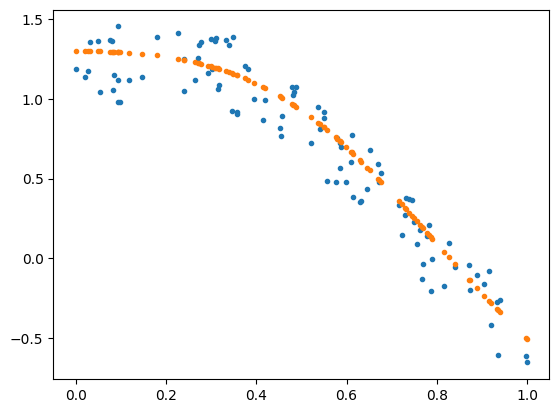

In [25]:
z = model.predict(x)

plt.plot(x[:,0], y[:,0], ".")
plt.plot(x[:,0], z[:,0], ".")
plt.show()

# Pytorch

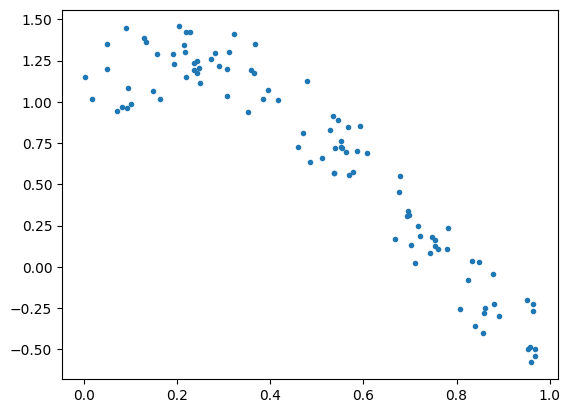

In [26]:
# gen data
N_sam = 100
x = torch.rand(N_sam, 1)
y = torch.sin(3*x+1)+0.5*torch.rand(N_sam,1)
plt.plot(x[:,0], y[:,0], ".")

In [27]:
# MLP [1, 32, 16, 1]

w1 = torch.randn(1, 32, requires_grad=True)
w2 = torch.randn(32, 16, requires_grad=True)
w3 = torch.randn(16, 1, requires_grad=True)

b1 = torch.randn(32, requires_grad=True)
b2 = torch.randn(16, requires_grad=True)
b3 = torch.randn(1, requires_grad=True)

def model(x):
    x = torch.sigmoid(x@w1+b1)
    x = torch.sigmoid(x@w2+b2)

    return x@w3+b3

def mse(pred, target):
    e = pred-target

    return torch.mean(e*e)

lr=0.1
for epoch in range(1, 3001):
    p = model(x)
    loss = mse(p, y)
    if(epoch%1000==0):
        print(epoch, loss.item())

    loss.backward() # diff

    with torch.no_grad():
        w1 -= w1.grad*lr
        w2 -= w2.grad*lr
        w3 -= w3.grad*lr
        b1 -= b1.grad*lr
        b2 -= b2.grad*lr
        b3 -= b3.grad*lr
        # reset grad = 0
        w1.grad.zero_()
        w2.grad.zero_()
        w3.grad.zero_()
        b1.grad.zero_()
        b2.grad.zero_()
        b3.grad.zero_()

1000 0.029281124472618103
2000 0.025056900456547737
3000 0.023373031988739967


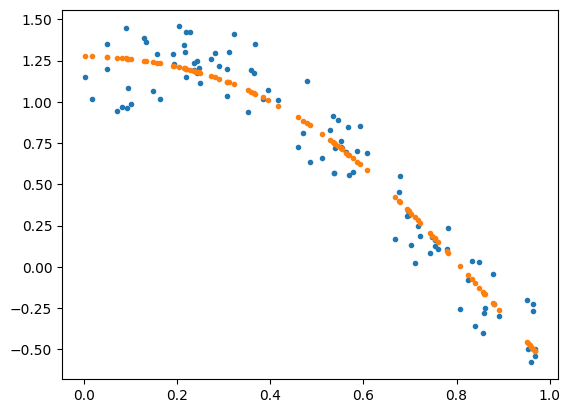

In [28]:
with torch.no_grad():
    z = model(x).numpy()

plt.plot(x[:,0], y[:,0], ".")
plt.plot(x[:,0], z[:,0], ".")
plt.show()

## Sequential

In [29]:
from torch import nn

In [30]:
model = nn.Sequential(
    nn.Linear(1, 32),
    nn.Sigmoid(),
    nn.Linear(32, 16),
    nn.Sigmoid(),
    nn.Linear(16, 1),
)

In [31]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.MSELoss()

epochs = 3000
#set train mode
model.train()

for epoch in range(1, epochs+1):
    z = model(x)
    loss = loss_fn(z, y)

    optimizer.zero_grad() #for all set parameter
    loss.backward()
    optimizer.step() # update w

    if(epoch%1000==0):
        print(epoch, loss.item())

1000 0.049020495265722275
2000 0.04304640740156174
3000 0.037750374525785446


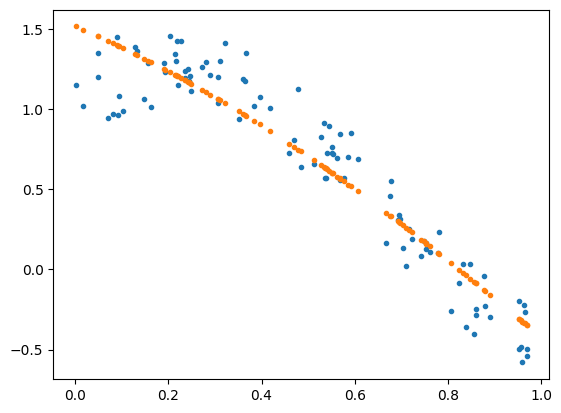

In [32]:
# set eval mode

model.eval()
with torch.no_grad():
    z = model(x) # auto detach
    z = z.numpy()

plt.plot(x[:,0], y[:,0], ".")
plt.plot(x[:,0], z[:,0], ".")
plt.show()

## Module

In [33]:
class Regressor(nn.Module):
    def __init__(self) :
        super().__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return self.fc3(x)

In [34]:
model = Regressor()

In [35]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.MSELoss()

epochs = 3000
#set train mode
model.train()

for epoch in range(1, epochs+1):
    z = model(x)
    loss = loss_fn(z, y)

    optimizer.zero_grad() #for all set parameter
    loss.backward()
    optimizer.step() # update w

    if(epoch%1000==0):
        print(epoch, loss.item())

1000 0.04977657273411751
2000 0.04215206578373909
3000 0.035728830844163895


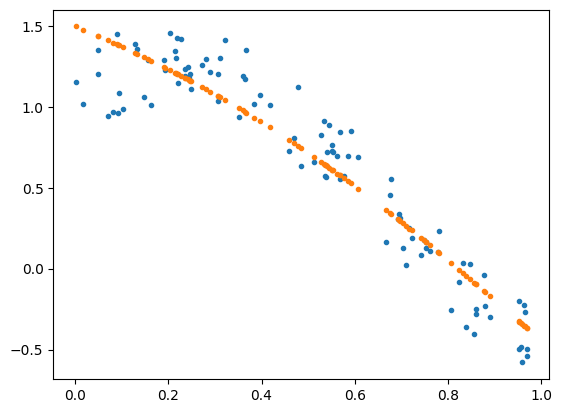

In [36]:
# set eval mode

model.eval()
with torch.no_grad():
    z = model(x) # auto detach
    z = z.numpy()

plt.plot(x[:,0], y[:,0], ".")
plt.plot(x[:,0], z[:,0], ".")
plt.show()

# Dataloader

In [37]:
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [38]:
type(x)

torch.Tensor

In [39]:
train_dataloader = DataLoader(TensorDataset(x, y), batch_size=16)

In [40]:
for x_, y_ in train_dataloader:
    print(x_.shape, y_.shape)

torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([4, 1]) torch.Size([4, 1])


### custom dataset

In [41]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __getitem__(self, i):
        return self.x[i], self.y[i]

    def __len__(self):
        return len(self.x)

In [42]:
train_dataset = MyDataset(x, y)
train_dataloader = DataLoader(train_dataset, batch_size=16)

In [43]:
for x_, y_ in train_dataloader:
    print(x_.shape, y_.shape)

torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([16, 1]) torch.Size([16, 1])
torch.Size([4, 1]) torch.Size([4, 1])


# open images

In [44]:
from openimages.download import download_images

In [45]:
!mkdir dataset
!touch dataset/exclusions.txt

In [48]:
download_images('dataset', ["Dog", "Cat"], 'dataset/exclusions.txt', limit=100)

/Users/madness/Desktop/SuperAIss4/all-code/env/lib/python3.10/site-packages/openimages/download.py:504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_images.drop(["LabelName"], axis=1, inplace=True)
/Users/madness/Desktop/SuperAIss4/all-code/env/lib/python3.10/site-packages/openimages/download.py:504: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_images.drop(["LabelName"], axis=1, inplace=True)
2024-04-10  15:25:27 INFO Downloading 100 train images for class 'dog'
100%|██████████| 100/100 [00:11<00:00,  9.08it/s]
2024-04-10  15:25:39 INFO Downloading 100 train images for class 'cat'
100%|██████████| 1

{'dog': 'dataset/dog/images', 'cat': 'dataset/cat/images'}

In [49]:
import glob

In [50]:
len(glob.glob('dataset/dog/images/*.jpg'))

100

In [ ]:
len(glob.glob('dataset/cat/images/*.jpg'))

In [51]:
from PIL import Image
import os

class DognCat(Dataset):
    def __init__(self, path, transform=None):
        self.fn = glob.glob(os.path.join(path, '**/*.jpg'), recursive=True)
        self.transform = transform
        self.labels = [f.split(os.sep)[-1] for f in glob.glob(os.path.join('dataset', '*')) if os.path.isdir(f)]


    def __getitem__(self, i):
        x = Image.open(self.fn[i]).convert('RGB')
        if(self.transform is not None):
            x = self.transform(x)
        y = self.labels.index(self.fn[i].split(os.sep)[1])
        return x, y

    def __len__(self):
        return len(self.fn)

In [52]:
dataset = DognCat('dataset')

In [54]:
iter_dataset = iter(dataset)

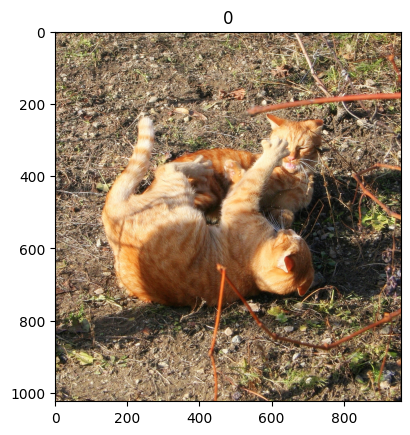

In [60]:
x, y = next(iter_dataset)
plt.imshow(x)
plt.title(y)
plt.show()

## transform

In [61]:
from torchvision import transforms
from torchvision.transforms import v2

In [62]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [68]:
dataset = DognCat('dataset', transform)

In [69]:
iter_dataset = iter(dataset)
x, y = next(iter_dataset)
x# normalize 0-1

Image([[[0.0196, 0.0157, 0.0196,  ..., 0.5176, 0.4863, 0.4353],
        [0.0196, 0.0157, 0.0196,  ..., 0.5137, 0.4863, 0.4392],
        [0.0196, 0.0196, 0.0196,  ..., 0.5216, 0.4980, 0.4275],
        ...,
        [0.0196, 0.0157, 0.0157,  ..., 0.1373, 0.1333, 0.1255],
        [0.0196, 0.0196, 0.0157,  ..., 0.1333, 0.1373, 0.1294],
        [0.0235, 0.0157, 0.0157,  ..., 0.1294, 0.1255, 0.1137]],

       [[0.0235, 0.0196, 0.0196,  ..., 0.6078, 0.5686, 0.5020],
        [0.0196, 0.0196, 0.0196,  ..., 0.6078, 0.5647, 0.5020],
        [0.0196, 0.0196, 0.0196,  ..., 0.6118, 0.5686, 0.4902],
        ...,
        [0.0196, 0.0196, 0.0196,  ..., 0.1647, 0.1608, 0.1490],
        [0.0196, 0.0196, 0.0196,  ..., 0.1647, 0.1608, 0.1451],
        [0.0196, 0.0196, 0.0196,  ..., 0.1608, 0.1529, 0.1373]],

       [[0.0235, 0.0275, 0.0275,  ..., 0.7098, 0.6471, 0.5569],
        [0.0314, 0.0275, 0.0235,  ..., 0.7098, 0.6471, 0.5569],
        [0.0235, 0.0196, 0.0196,  ..., 0.7176, 0.6549, 0.5529],
        ..

In [67]:
# v2 transform

transform = v2.Compose([
    v2.Resize((224, 224)),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True) #ถ้าไม่ทำ จะออกมาป็น uint8 เพียวๆ
])

# einops

In [79]:
import einops

In [74]:
dog = plt.imread('/Users/madness/Desktop/SuperAIss4/all-code/dataset/dog/images/00a1ab47b5439e8c.jpg')
cat = plt.imread('/Users/madness/Desktop/SuperAIss4/all-code/dataset/cat/images/00a1fff876518970.jpg')

In [71]:
dog.shape, cat.shape

((683, 1024, 3), (768, 1024, 3))

In [72]:
import cv2

In [75]:
cat = cv2.resize(cat, (600, 800))

In [76]:
dog = cv2.resize(dog, (600, 800))

In [77]:
dog.shape, cat.shape

((800, 600, 3), (800, 600, 3))

In [78]:
image = np.array([cat, dog])

In [80]:
image = image/255.

In [81]:
image_reduce = einops.reduce(image, 'b (h 10) (w 10) c -> b h w c', 'mean')

In [82]:
image_reduce.shape

(2, 80, 60, 3)

In [83]:
image_rearrange = einops.rearrange(image_reduce, 'b h w c -> b c h w')

In [84]:
image_rearrange.shape

(2, 3, 80, 60)

In [86]:
# p =patch
ph, pw = 4, 4
xx = einops.rearrange(image_reduce, 'b (h ph) (w pw) c -> b (h w) ph pw c', ph=ph, pw=pw)

In [87]:
xx.shape

(2, 300, 4, 4, 3)

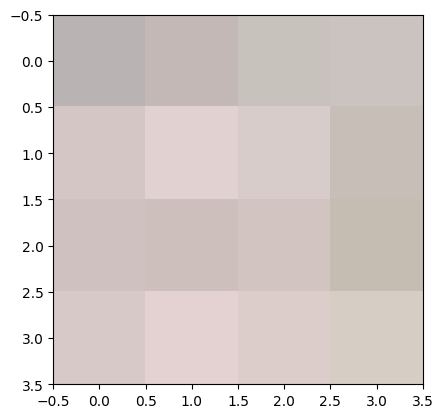

In [89]:
plt.imshow(xx[0][0])

## ViT

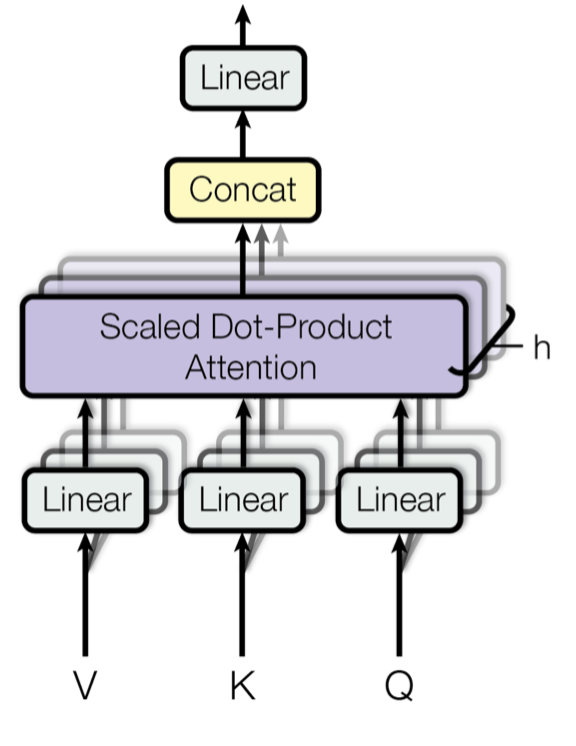

In [91]:
import math
import torch.nn.functional as F

In [92]:
class Attention(nn.Module):
    def __init__(self, d): #d=size
        super().__init__()
        self.d = d
        #use all fully connected
        #query key ต้องมา dot กัน size ต้องเท่ากัน
        self.Q = nn.Linear(d, d) #query
        self.K = nn.Linear(d, d) # key
        self.V = nn.Linear(d, d) # value

    def forward(self, x):
        q = self.Q(x)
        k = self.K(x)
        v = self.V(x)

        #find similarity between q and k
        score = F.softmax(torch.matmul(q, k.transpose(1, 2))/math.sqrt(self.d), dim=-1)

        return torch.matmul(score, v)

In [93]:
x = torch.rand((10, 100, 128)) #b p a
attn =Attention(128)

In [94]:
a = attn(x)
a.shape

torch.Size([10, 100, 128])

In [95]:
from einops.layers.torch import Rearrange

In [98]:
class MultiheadAttention(nn.Module):
    def __init__(self, head, d):
        super().__init__()
        self.head = head
        self.d = d
        self.attentions = nn.ModuleList([])

        for _ in range(head):
            self.attentions.append(Attention(d))
        self.linear = nn.Linear(head*d, d)

    def forward(self, x):
        X = []
        for attention in self.attentions:
            X.append(attention(x))
        
        X = einops.rearrange(X, 'h b p d -> b p (h d)')

        return self.linear(X) # ออกมายาวเท่าเดิม

In [99]:
mha = MultiheadAttention(8, 128) #original=8
a = mha(x)
a.shape

torch.Size([10, 100, 128])

In [100]:
# want vector that a bit changer from left to right
class PositionalEncoding(nn.Module): 
    def __init__(self, d, patch):
        super().__init__()
        pe = torch.zeros(patch, d)
        pos = torch.arange(0, patch, dtype=torch.float).unsqueeze(1) #gen index+add dimension
        inv = torch.exp(torch.arange(0, d, 2, dtype=torch.float) * -math.log(10000.)/d)
        pe[:, 0::2] = torch.sin(pos*inv)
        pe[:, 1::2] = torch.cos(pos*inv)
        pe = pe.unsqueeze(0)

        self.register_buffer('pe', pe) #ประหยัด mem

    def forward(self, x):
        return x+self.pe[:, :x.size(1)]

In [101]:
pos_encoder = PositionalEncoding(128, 100)

In [102]:
ap = pos_encoder(a)
ap.shape

torch.Size([10, 100, 128])

คง shape but add knowledge like index

In [103]:
class Transformer(nn.Module):
    def __init__(self, d, hidden, head=8, n_MSA=2): #MSA = multi head attention
        super().__init__()
        self.norm = nn.LayerNorm(d)
        self.MSAs = nn.ModuleList([])
        for _ in range(n_MSA):
            self.MSAs.append(nn.ModuleList([
                MultiheadAttention(head, d),
                nn.Linear(d, hidden),
                nn.Linear(hidden, d)
            ]))

    def forward(self, x):
        for msa, fc1, fc2 in self.MSAs:
            x = self.norm(msa(x)+x)
            x = self.norm(fc2(F.relu(fc1(x)))+x)
        return x

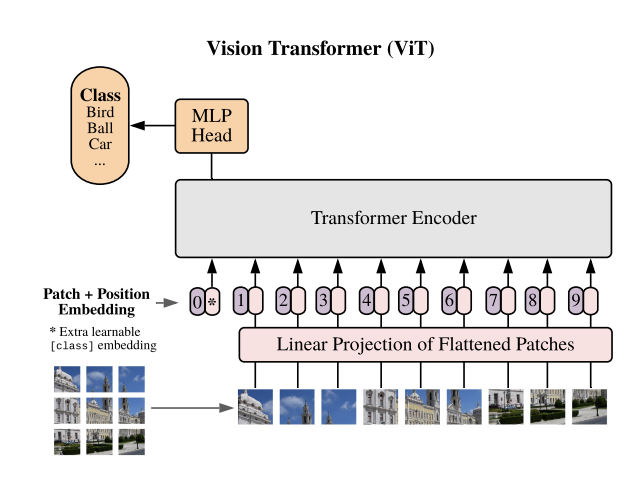

In [104]:
class ViT(nn.Module):
    def __init__(self, image_size=(224, 224), patch_size=(16, 16), channel=3, d=128, classes=1000): #set original in paper and Imagenet
        super().__init__()
        self.patch = nn.Sequential(
            Rearrange('b c (h ph) (w pw) -> b (h w) (ph pw c)', ph=patch_size[0], pw=patch_size[1]),
            nn.Linear(patch_size[0]*patch_size[1]*channel, d) #ยืดเป็น vector และบีบ size
        )
        patch = (image_size[0]//patch_size[0])*(image_size[1]//patch_size[1])
        self.position_encoder = PositionalEncoding(d, patch+1)
        self.cls_token = nn.Parameter(torch.rand(1, 1, d)) #สุ่มครั้งเดียว หลังจากนั้นอัปเดตตาม back propagation
        self.transformer = Transformer(d, 2*d)
        self.norm = nn.LayerNorm(d)
        #output layer
        self.fc = nn.Linear(d, classes)

    def forward(self, x):
        #prepare before put in transformer
        x = self.patch(x)
        b, patch, d = x.shape
        cls_token = einops.repeat(self.cls_token, '1 p d -> b p d', b=b)
        x = torch.cat((cls_token, x), dim=1)

        x = self.transformer(x)
        x = x[:, 0]
        x = self.fc(self.norm(x))

        return F.softmax(x, dim=-1)

In [105]:
vit = ViT()

In [106]:
x = torch.rand((10, 3, 224, 224))

In [107]:
z = vit(x)
z.shape
# argmax for finding class in inner element

torch.Size([10, 1000])